In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from os import getcwd
from os.path import dirname, join, join
from typing import List, Tuple

# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from umap import UMAP

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
sys.path.append('../utils')
# import fasthit.utils.sequence_utils as s_utils
from fasthit.landscapes import NK, GB1, PhoQ
from fasthit import Landscape
# from fasthit.encoders import OneHot, ESM
###
from plots import overall, violin_and_cummax_round, success_ratio_plot, \
    success_ratio, RS, eval_model, read_data

In [4]:
wk_dir = '../runs/runs_new'

# Main text

## Fig. 2

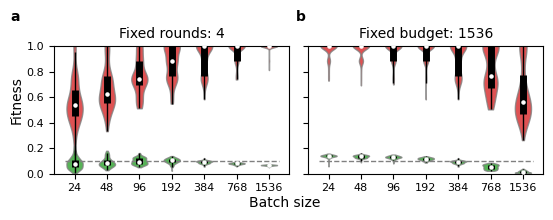

In [5]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(5.5, 2.0), dpi=100, sharex=True, sharey=True)
###
names_and_dirs = {
    24: f"{wk_dir}/gb1/budget_new2/24",
    48: f"{wk_dir}/gb1/budget_new2/48",
    96: f"{wk_dir}/gb1/budget_new2/96",
    192: f"{wk_dir}/gb1/budget_new2/192",
    384: f"{wk_dir}/gb1/budget_new2/384",
    768: f"{wk_dir}/gb1/budget_new2/768",
    1536: f"{wk_dir}/gb1/budget_new2/1536",
}
n = len(names_and_dirs)
overall(ax1, names_and_dirs, method='max', face_colors=n*[sns.color_palette()[3]])
ax1.tick_params(labelsize=8)
ax1.set_ylim(0.0, 1.0)
ax1.set_title('Fixed budget: 1536', fontsize=10)
ax1.hlines(0.1, -0.3, 6.3, linestyles='--', linewidth=1, colors='gray')
###
overall(ax1, names_and_dirs, method='mean', face_colors=n*[sns.color_palette()[2]])
###
names_and_dirs = {
    24: f"{wk_dir}/gb1/rounds_4/24",
    48: f"{wk_dir}/gb1/rounds_4/48",
    96: f"{wk_dir}/gb1/rounds_4/96",
    192: f"{wk_dir}/gb1/rounds_4/192",
    384: f"{wk_dir}/gb1/rounds_4/384",
    768: f"{wk_dir}/gb1/rounds_4/768",
    1536: f"{wk_dir}/gb1/rounds_4/1536",
}
n = len(names_and_dirs)
overall(ax2, names_and_dirs, method='max', face_colors=n*[sns.color_palette()[3]])
ax2.tick_params(labelsize=8)
ax2.set_ylim(0.0, 1.0)
ax2.set_title('Fixed rounds: 4', fontsize=10)
ax2.hlines(0.1, -0.3, 6.3, linestyles='--', linewidth=1, colors='gray')
###
overall(ax2, names_and_dirs, method='mean', face_colors=n*[sns.color_palette()[2]])
###
fig.text(0.0, 1.0, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.52, 1.0, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.0, 0.55, 'Fitness', ha='left', va='center', rotation='vertical', fontsize=10)
fig.text(0.5, 0.0, 'Batch size', ha='center', va='bottom', rotation='horizontal', fontsize=10)
###
fig.tight_layout(pad=1.2, w_pad=1)
###

## Fig. 3

Fig. 3a

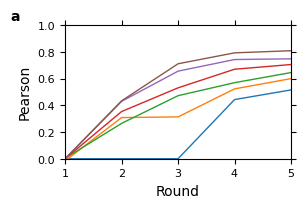

In [6]:
fig, ax2 = plt.subplots(figsize=(3, 2.0), dpi=100)
###
names_and_dirs = {
    'Georgiev': f"{wk_dir}/gb1/model/georgiev",
    'TAPE': f"{wk_dir}/gb1/model/transformer",
    'Onehot': f"{wk_dir}/gb1/model/onehot",
    'UniRep': f"{wk_dir}/gb1/model/unirep",
    'esm-1v': f"{wk_dir}/gb1/model/esm-1v",
    'ProtT5-XL-U50': f"{wk_dir}/gb1/model/prot_t5_xl_uniref50",
}
###
method = 'Pearson'
eval_model(ax2, names_and_dirs, method=method)
ax2.get_legend().set_visible(False)
ax2.tick_params(labelsize=8, right=True, top=True)
ax2.set_xlabel('Round', fontsize=10)
ax2.set_ylabel('Pearson', fontsize=10)
ax2.set_xlim(1, 5)
ax2.set_ylim(0, 1.0)
###
fig.text(0.01, 1.00, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
###
fig.tight_layout(pad=0.8, h_pad=1, w_pad=1)
plt.savefig('../figs/fig3a.png', format='png', dpi=300)
plt.savefig('../figs/fig3a.svg', format='svg')

Fig. 3b-c

Round 5-Georgiev: 11.00%
Round 5-Onehot: 68.00%
Round 5-ProtT5-XL-U50: 77.00%
Round 5-TAPE: 54.00%
Round 5-UniRep: 61.00%
Round 5-esm-1v: 69.00%


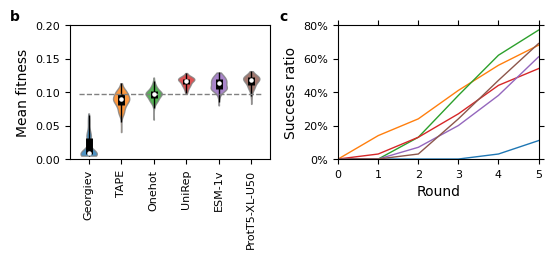

In [7]:
###
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(5.5, 2.5), dpi=100)
###
names_and_dirs = {
    'Georgiev': f"{wk_dir}/gb1/encoder_5/georgiev",
    'TAPE': f"{wk_dir}/gb1/encoder_5/transformer",
    'Onehot': f"{wk_dir}/gb1/rounds_new2/384",
    'UniRep': f"{wk_dir}/gb1/encoder_5/unirep",
    'esm-1v': f"{wk_dir}/gb1/encoder_5/esm-1v",
    'ProtT5-XL-U50': f"{wk_dir}/gb1/encoder_5/prot_t5_xl_uniref50",
}
success_ratio_plot(ax1, names_and_dirs, level=100.)
ax1.set_ylim(0, 80)
ax1.get_legend().set_visible(False)
ax1.tick_params(labelsize=8, right=True, top=True)
ax1.set_xlabel('Round', fontsize=10)
ax1.set_ylabel('Success ratio', fontsize=10)
ax1.set_xlim(0, 5)
###
names_and_dirs = {
    0: f"{wk_dir}/gb1/encoder_5/georgiev",
    1: f"{wk_dir}/gb1/encoder_5/transformer",
    2: f"{wk_dir}/gb1/rounds_new2/384",
    3: f"{wk_dir}/gb1/encoder_5/unirep",
    4: f"{wk_dir}/gb1/encoder_5/esm-1v",
    5: f"{wk_dir}/gb1/encoder_5/prot_t5_xl_uniref50",
}
xticklabels = ['Georgiev', 'TAPE', 'Onehot', 'UniRep', 'ESM-1v', 'ProtT5-XL-U50']
###
overall(ax2, names_and_dirs, method='mean')
ax2.tick_params(labelsize=8)
ax2.set_xticklabels(xticklabels, rotation=90)
ax2.set_xlabel('')
ax2.set_yticks([0.0, 0.05, 0.1, 0.15, 0.2])
ax2.hlines(0.097, -0.3, 5.3, linestyles='--', linewidth=1, colors='gray')
ax2.set_ylabel(f'Mean fitness', fontsize=10)
ax2.set_ylim(0.0, 0.2)
###
fig.text(0.01, 1.00, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.50, 1.00, 'c', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
###
fig.tight_layout(pad=0.8, w_pad=1)
plt.savefig('../figs/fig3b-c.png', format='png', dpi=300)
plt.savefig('../figs/fig3b-c.svg', format='svg')

## Fig. 4

Round 5-Cool: 68.00%
Round 5-Warm: 78.00%


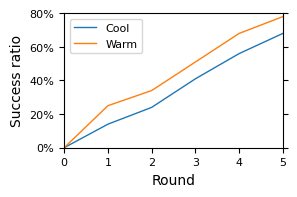

In [8]:
fig, ax1 = plt.subplots(figsize=(3, 2.0), dpi=100)
###
names_and_dirs = {
    "Cool": f"{wk_dir}/gb1/rounds_new2/384",
    "Warm": f"{wk_dir}/gb1/warm_start/warm",
}
###
success_ratio_plot(ax1, names_and_dirs, level=100., print_rounds=[5])
ax1.legend(fontsize=8)
ax1.tick_params(labelsize=8, right=True)
ax1.set_xlabel('Round', fontsize=10)
ax1.set_ylabel('Success ratio', fontsize=10)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 80)
###
fig.tight_layout(pad=0.8, h_pad=1, w_pad=1)
###
plt.savefig('../figs/fig4.png', format='png', dpi=300)
plt.savefig('../figs/fig4.svg', format='svg')

## Fig. 5

Round 5-AdaLead: 54.00%
Round 5-BO: 90.00%
Round 5-BO-EVO: 75.00%
Round 5-Random: 33.00%


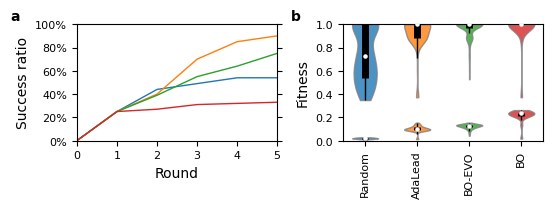

In [9]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(5.5, 2), dpi=100)
###
names_and_dirs = {
    'Random': f"{wk_dir}/gb1/explorer_warm/random",
    'AdaLead': f"{wk_dir}/gb1/explorer_warm/adalead",
    # 'Random-MS': f"{wk_dir}/gb1/explorer_warm/random_ms",
    'BO-EVO': f"{wk_dir}/gb1/explorer_warm/bo_evo",
    'BO': f"{wk_dir}/gb1/explorer_warm/bo_enu",
}
success_ratio_plot(ax2, names_and_dirs)
ax2.get_legend().set_visible(False)
ax2.tick_params(labelsize=8, right=True)
ax2.set_xlabel('Round', fontsize=10)
ax2.set_ylabel('Success ratio', fontsize=10)
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 100)
###
names_and_dirs = {
    0: f"{wk_dir}/gb1/explorer_warm/random",
    1: f"{wk_dir}/gb1/explorer_warm/adalead",
    # 2: f"{wk_dir}/gb1/explorer_warm/random_ms",
    3: f"{wk_dir}/gb1/explorer_warm/bo_evo",
    4: f"{wk_dir}/gb1/explorer_warm/bo_enu",
}
n = len(names_and_dirs)
xticklabels = ['Random', 'AdaLead', 'BO-EVO', 'BO']# 'Random-MS',
overall(ax1, names_and_dirs, method='max', face_colors=sns.color_palette()[:5])
overall(ax1, names_and_dirs, method='mean', face_colors=sns.color_palette()[:5])
ax1.tick_params(labelsize=8)
ax1.set_xticklabels(xticklabels, rotation=90)
ax1.set_ylabel('Fitness', fontsize=10)
ax1.set_ylim(0.0, 1.0)
###
# ax1.hlines(0.11, -0.3, 4.3, linestyles='--', linewidth=1, colors='gray')
fig.text(0.01, 1.00, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.52, 1.00, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
###
fig.tight_layout(pad=0.8, h_pad=1, w_pad=1)
###
plt.savefig('../figs/fig5.png', format='png', dpi=300)
plt.savefig('../figs/fig5.svg', format='svg')

## Fig. 6

In [10]:
lnd_names = [
    'N4K0_exp_zipf_hole', 'N4K1_exp_zipf_hole', 'N4K2_exp_zipf_hole', 'N4K3_exp_zipf_hole',
    'GB1', 'PhoQ',
]
landscapes = []
files = []
landscapes.append(NK(4, 0, epi='exp', pos_weight='zipf', cut_off=0.3))
landscapes.append(NK(4, 1, epi='exp', pos_weight='zipf', cut_off=0.3))
landscapes.append(NK(4, 2, epi='exp', pos_weight='zipf', cut_off=0.3))
landscapes.append(NK(4, 3, epi='exp', pos_weight='zipf', cut_off=0.3))
landscapes.append(GB1('with_imputed', 'V39,D40,G41,V54'))
landscapes.append(PhoQ('A284,V285,S288,T289'))
files.append(f'../data/nk/landscapes/N4K0_exp_zipf_hole_rs.csv')
files.append(f'../data/nk/landscapes/N4K1_exp_zipf_hole_rs.csv')
files.append(f'../data/nk/landscapes/N4K2_exp_zipf_hole_rs.csv')
files.append(f'../data/nk/landscapes/N4K3_exp_zipf_hole_rs.csv')
files.append(f'../data/gb1/landscapes/gb1_rs.csv')
files.append(f'../data/phoq/landscapes/phoq_rs.csv')
###
rs = RS(landscapes, files)

In [11]:
names_and_dirs = {
    "N4K0": f"{wk_dir}/nk/landscape/N4K0_exp_zipf_hole0.3",
    "N4K1": f"{wk_dir}/nk/landscape/N4K1_exp_zipf_hole0.3",
    "N4K2": f"{wk_dir}/nk/landscape/N4K2_exp_zipf_hole0.3",
    "N4K3": f"{wk_dir}/nk/landscape/N4K3_exp_zipf_hole0.3",
    "GB1": f"{wk_dir}/gb1/rounds_new2/384",
    "PhoQ": f"{wk_dir}/phoq/landscape/measured_only",
}
ratios = success_ratio(names_and_dirs, level=100.)
scores = ratios[5]

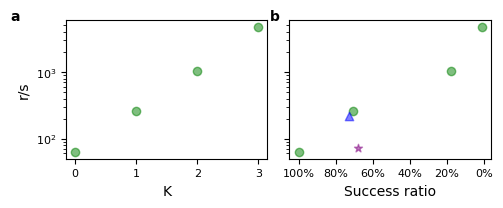

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5.0, 2.0), dpi=100, sharey=True)
ax1.scatter(y=rs[:4], x=[0, 1, 2, 3], alpha=0.5, c='green')
# ax1.scatter(y=rs[4], x=[0], alpha=0.5, c='purple', marker='*')
# ax1.scatter(y=rs[5], x=[1], alpha=0.5, c='blue', marker='^')
ax1.tick_params(labelsize=8)
ax1.set_ylabel('r/s', fontsize=10)
ax1.set_xlabel('K', fontsize=10)
ax1.semilogy()
###
ax2.scatter(y=rs[:4], x=scores[:4], alpha=0.5, c='green')
ax2.scatter(y=rs[4], x=scores[4], alpha=0.5, c='purple', marker='*')
ax2.scatter(y=rs[5], x=scores[5], alpha=0.5, c='blue', marker='^')
ax2.tick_params(labelsize=8)
ax2.semilogy()
ax2.invert_xaxis()
ax2.set_xlabel('Success ratio', fontsize=10)
ax2.xaxis.set_major_formatter(mtick.PercentFormatter())
###
fig.text(0.01, 1.00, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.53, 1.00, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
###
fig.tight_layout(pad=0.8, w_pad=1)

plt.show()

## Fig. 7

     round  measurement_cost  true_score
rep                                     
0        0                 1    1.000000
0        1                76    2.992600
0        2               448    4.347123
0        3               814    6.256908
0        4              1191    7.352207
0        5              1570    7.352207


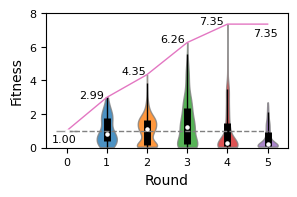

In [13]:
fig, ax2 = plt.subplots(figsize=(3, 2.0), dpi=100)
###
path = f"runs/rhla/"
violin_and_cummax_round(ax2, path)
ax2.tick_params(labelsize=8)
ax2.set_xlabel('Round', fontsize=10)
ax2.set_ylabel(f'Fitness', fontsize=10)
ax2.set_xlim(-0.5, 5.5)
ax2.set_ylim(0., 8.)
ax2.hlines(1., 0.0, 5., linestyles='--', colors='gray', linewidth=1)
###
fig.text(0.26, 0.27, '1.00', va='bottom', ha='right', rotation='horizontal', fontsize=8)
fig.text(0.35, 0.49, '2.99', va='bottom', ha='right', rotation='horizontal', fontsize=8)
fig.text(0.49, 0.61, '4.35', va='bottom', ha='right', rotation='horizontal', fontsize=8)
fig.text(0.62, 0.77, '6.26', va='bottom', ha='right', rotation='horizontal', fontsize=8)
fig.text(0.75, 0.86, '7.35', va='bottom', ha='right', rotation='horizontal', fontsize=8)
fig.text(0.93, 0.80, '7.35', va='bottom', ha='right', rotation='horizontal', fontsize=8)
###
fig.tight_layout(pad=0.8)
plt.savefig('../figs/fig7.png', format='png', dpi=300)
plt.savefig('../figs/fig7.svg', format='svg')

In [14]:
path = f"runs/rhla/"
df = read_data(path)
df = df[df['round'] <= 4]
df

,sequence,model_score,true_score,round,model_cost,measurement_cost,rep
0,RALS,NaN,1.000000,0,0,1,0
1,AALS,NaN,1.811700,1,0,76,0
2,CALS,NaN,1.641000,1,0,76,0
3,DALS,NaN,0.592900,1,0,76,0
4,EALS,NaN,0.854800,1,0,76,0
...,...,...,...,...,...,...,...
1186,HNHP,-0.226757,0.100366,4,10112,1191,0
1187,HHPQ,-0.241138,0.118480,4,10112,1191,0
1188,DHLW,-0.259799,0.114426,4,10112,1191,0
1189,GNRE,-0.342999,0.135962,4,10112,1191,0


# Supplimentary figures

## Fig. S1

In [15]:
lnd_names = ['Original_NK', 'Exp_NK', 'Exp_NK_Zipf', 'Exp_NK_Zipf_hole', 'GB1', 'PhoQ']
N, K = 4, 1
landscapes = []
landscapes.append(NK(N, K))
landscapes.append(NK(N, K, epi='exp'))
landscapes.append(NK(N, K, epi='exp', pos_weight='zipf'))
landscapes.append(NK(N, K, epi='exp', pos_weight='zipf', cut_off=0.3))
landscapes.append(GB1('with_imputed', 'V39,D40,G41,V54'))
landscapes.append(PhoQ('A284,V285,S288,T289'))
#
data_all = []
data = []
for i, landscape in enumerate(landscapes):
    data_all.append(np.array(list(landscape._sequences.values())))
    data.append(data_all[i][data_all[i]>0.])
    print(lnd_names[i], len(data[i])/len(data_all[i]))

Original_NK 0.99999375
Exp_NK 0.99999375
Exp_NK_Zipf 0.99999375
Exp_NK_Zipf_hole 0.0712375
GB1 0.81576875
PhoQ 0.36302369108364113


In [16]:
gb1 = landscapes[4]
n_gb1 = len(gb1._sequences)
wt_gb1 = gb1._sequences['VDGV']
print(wt_gb1)
df_gb1 = pd.DataFrame(
    {
        'seq': gb1._sequences.keys(),
        'fitness': gb1._sequences.values(),
    }
)
df_gb1 = df_gb1[df_gb1['fitness'] > wt_gb1]
print(df_gb1.count(axis=0)['seq']/n_gb1)
###
phoq = landscapes[5]
n_phoq = len(phoq._sequences)
wt_phoq = phoq._sequences['AVST']
print(wt_phoq)
df_phoq = pd.DataFrame(
    {
        'seq': phoq._sequences.keys(),
        'fitness': phoq._sequences.values(),
    }
)
df_phoq = df_phoq[df_phoq['fitness'] > wt_phoq]
print(df_phoq.count(axis=0)['seq']/n_phoq)

0.10087673659442013
0.02313125
0.0246076971190456
0.059423414960467415


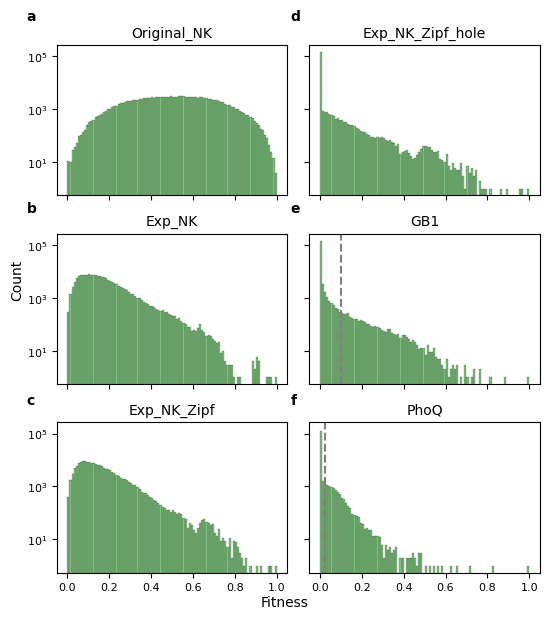

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(5.5,6), dpi=100, sharex=True, sharey=True)
scales = [(False, True)] * 6
for i, ax in enumerate(axes.transpose().reshape(-1)):
    sns.histplot(ax=ax, x=data_all[i], binwidth=0.01, log_scale=scales[i], color='green', alpha=0.5)
    ax.set_title(lnd_names[i], fontsize=10)
    ax.tick_params(labelsize=8)
    ax.set_ylabel('')
###
# axes[0,1].axvline(x=0.1, color='gray', linestyle='--')
axes[1,1].axvline(x=0.1, color='gray', linestyle='--')
axes[2,1].axvline(x=0.0246, color='gray', linestyle='--')
###
fig.text(0.03, 1.00, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.03, 0.68, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.03, 0.36, 'c', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.51, 1.00, 'd', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.51, 0.68, 'e', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.51, 0.36, 'f', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.0, 0.55, 'Count', ha='left', va='center', rotation='vertical', fontsize=10)
fig.text(0.50, 0.0, 'Fitness', ha='center', va='bottom', rotation='horizontal', fontsize=10)
###
fig.tight_layout(pad=1.2, h_pad=1, w_pad=1)
###
plt.show()

## Fig. S2

In [18]:
lnd_names = ['GB1', 'Standard_NK', 'Exp_NK', 'Exp_NK_zipf', 'Exp_NK_zipf_hole']
NK_select = [[4, 0], [4, 1]]

gb1_prefix = join(dirname(getcwd()), 'data/gb1/landscapes')
nk_prefix = join(dirname(getcwd()), 'data/nk/landscapes')

landscapes: List[Landscape] = []
files: List[str] = []

datas: Tuple[pd.DataFrame, pd.DataFrame] = []
for N, K in NK_select:
    landscapes = []
    files = []
    for seed in [1, 12, 123, 1234, 12345]:
        landscapes.append(GB1('with_imputed', 'V39,D40,G41,V54'))
        files.append(join(gb1_prefix, 'gb1.csv'))
        landscapes.append(NK(N, K, seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_{seed}.csv'))
        landscapes.append(NK(N, K, epi='exp', seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_exp_{seed}.csv'))
        landscapes.append(NK(N, K, epi='exp', pos_weight='zipf', seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_exp_zipf_{seed}.csv'))
        landscapes.append(NK(N, K, epi='exp', pos_weight='zipf', cut_off=0.3, seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_exp_zipf_hole_{seed}.csv'))
    rs_landscape = RS(landscapes, files).reshape(-1, 5)
    rs = pd.DataFrame(rs_landscape, columns=lnd_names)
    datas.append(rs)
rs0, rs1 = datas

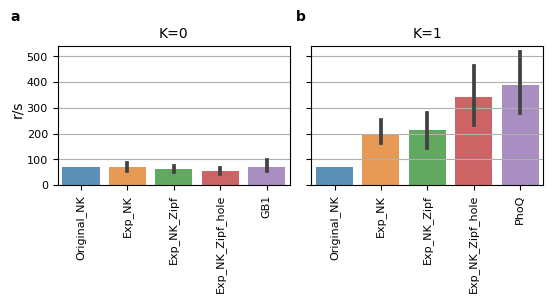

In [19]:
xlabels = [
    ['Original_NK', 'Exp_NK', 'Exp_NK_Zipf', 'Exp_NK_Zipf_hole', 'GB1'],
    ['Original_NK', 'Exp_NK', 'Exp_NK_Zipf', 'Exp_NK_Zipf_hole', 'PhoQ']
]
titles = ['K=0', 'K=1']
fig, axes = plt.subplots(1, 2, figsize=(5.5, 3), dpi=100, sharey=True)
for ax, rs, title, xlabel in zip(axes, (rs0, rs1), titles, xlabels):
    sns.barplot(ax=ax,data=rs, alpha=0.8)
    ax.set_title(title, fontsize=10)
    ax.set_xticks(range(len(xlabel)))
    ax.set_xticklabels(xlabel, fontsize=8, rotation=90)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='y', which='major')
###
fig.text(0.0, 0.67, 'r/s', va='center', rotation='vertical', fontsize=10)
fig.text(0.0, 1.00, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.52, 1.00, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
###
fig.tight_layout(pad=1.2, h_pad=1)
###
plt.savefig('../figs/fig_S2.png', format='png', dpi=300)
plt.savefig('../figs/fig_S2.svg', format='svg')

## Fig. S3

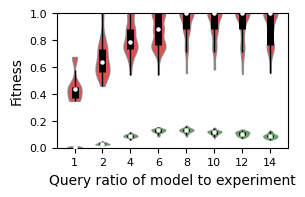

In [20]:
fig, ax1 = plt.subplots(figsize=(3, 2.0), dpi=100)
###
names_and_dirs = {
    1: f"{wk_dir}/gb1/MER_96/1",
    2: f"{wk_dir}/gb1/MER_96/2",
    4: f"{wk_dir}/gb1/MER_96/4",
    6: f"{wk_dir}/gb1/MER_96/6",
    8: f"{wk_dir}/gb1/MER_96/8",
    10: f"{wk_dir}/gb1/MER_96/10",
    12: f"{wk_dir}/gb1/MER_96/12",
    14: f"{wk_dir}/gb1/MER_96/14",
}
n = len(names_and_dirs)
overall(ax1, names_and_dirs, method='max', face_colors=n*[sns.color_palette()[3]])
ax1.tick_params(labelsize=8)
ax1.set_xlabel('Query ratio of model to experiment', fontsize=10)
ax1.set_ylabel('Fitness', fontsize=10)
ax1.set_ylim(0.0, 1.0)
###
overall(ax1, names_and_dirs, method='mean', face_colors=n*[sns.color_palette()[2]])
###
fig.tight_layout(pad=0.8)
#
plt.savefig('../figs/fig_S3.png', format='png', dpi=300)
plt.savefig('../figs/fig_S3.svg', format='svg')

## Fig. S4

In [21]:
path = f'runs_old_starts/nk/scalability/time.csv'
df = pd.read_csv(path)
evo = df.query('explorer == "bo_evo"')
enu = df.query('explorer == "bo_enu"')
###
fig, ax = plt.subplots(figsize=(3, 2), dpi=100)
xlabels = ['N=4', 'N=5', 'N=6']
###
ax.plot(evo['time(s)'].values, lw=1., c='green', alpha=0.8)
ax.plot(enu['time(s)'].values, lw=1., c='red', alpha=0.8)
ax.tick_params(labelsize=8, right=True)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(xlabels)
ax.set_ylabel(r'Computational time (s)', fontsize=10)
ax.legend(['BO-EVO', 'BO'], fontsize=8)
###
fig.tight_layout(pad=0.8)
###
plt.savefig('../figs/fig_S4.png', format='png', dpi=300)
plt.savefig('../figs/fig_S4.svg', format='svg')

FileNotFoundError: [Errno 2] No such file or directory: 'runs_old_starts/nk/scalability/time.csv'

## Fig. S5

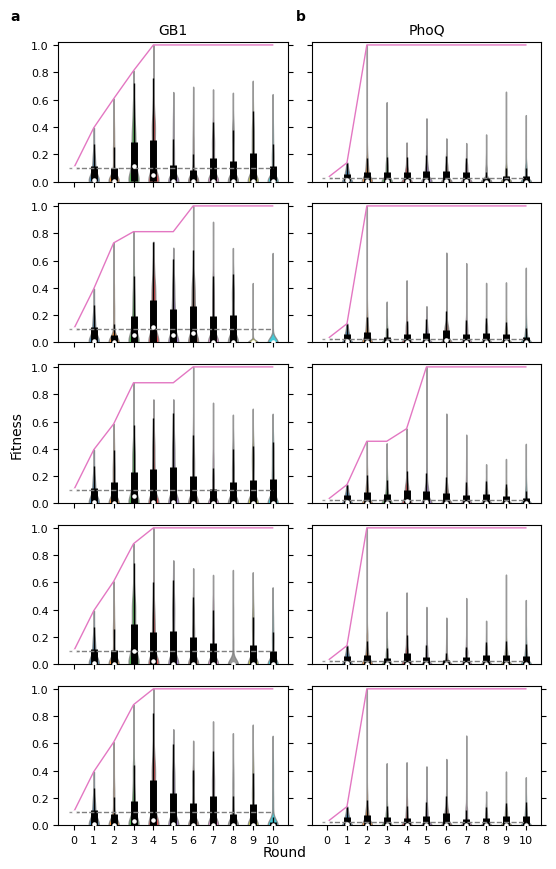

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(5.5, 8.5), dpi=100, sharex=True, sharey=True)
###
path = f"{wk_dir}/gb1/wt_only/warm"
ax1 = axes[0,0]
violin_and_cummax_round(ax1, path, print_value=False, rep=0)
ax1.set_title('GB1', fontsize=10)
ax1.tick_params(labelsize=8, right=True)
ax1.set_ylabel(f'', fontsize=10)
ax1.set_ylim(0., 1.02)
ax1.hlines(0.1, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax2 = axes[1,0]
violin_and_cummax_round(ax2, path, print_value=False, rep=1)
ax2.tick_params(labelsize=8, right=True)
ax2.set_ylabel(f'', fontsize=10)
ax2.set_ylim(0., 1.02)
ax2.hlines(0.1, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax3 = axes[2,0]
violin_and_cummax_round(ax3, path, print_value=False, rep=2)
ax3.tick_params(labelsize=8, right=True)
ax3.set_ylabel(f'', fontsize=10)
ax3.set_ylim(0., 1.02)
ax3.hlines(0.1, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax4 = axes[3,0]
violin_and_cummax_round(ax4, path, print_value=False, rep=3)
ax4.tick_params(labelsize=8, right=True)
ax4.set_ylabel(f'', fontsize=10)
ax4.set_ylim(0., 1.02)
ax4.hlines(0.1, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax5 = axes[4,0]
violin_and_cummax_round(ax5, path, print_value=False, rep=4)
ax5.tick_params(labelsize=8, right=True)
ax5.set_ylabel(f'', fontsize=10)
ax5.set_ylim(0., 1.02)
ax5.set_xlabel(f'', fontsize=10)
ax5.hlines(0.1, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
###
path = f"{wk_dir}/phoq/wt_only/warm"
ax6 = axes[0,1]
violin_and_cummax_round(ax6, path, print_value=False, rep=0)
ax6.set_title('PhoQ', fontsize=10)
# ax6.tick_params(labelsize=8, right=True)
# ax6.set_ylabel(f'', fontsize=10)
ax6.hlines(0.025, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax7 = axes[1,1]
violin_and_cummax_round(ax7, path, print_value=False, rep=1)
ax7.hlines(0.025, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax8 = axes[2,1]
violin_and_cummax_round(ax8, path, print_value=False, rep=2)
ax8.hlines(0.025, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax9 = axes[3,1]
violin_and_cummax_round(ax9, path, print_value=False, rep=3)
ax9.hlines(0.025, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
###
ax10 = axes[4,1]
violin_and_cummax_round(ax10, path, print_value=False, rep=4)
ax10.hlines(0.025, 0.0, 10., linestyles='--', colors='gray', linewidth=1)
ax10.tick_params(labelsize=8, right=True)
ax10.set_xlabel(f'', fontsize=10)
###
###
fig.text(0.0, 1.0, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.52, 1.0, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.0, 0.5, 'Fitness', ha='left', va='center', rotation='vertical', fontsize=10)
fig.text(0.5, 0.0, 'Round', ha='center', va='bottom', rotation='horizontal', fontsize=10)
###
fig.tight_layout(pad=1.0)
plt.savefig('../figs/fig_S5.png', format='png', dpi=300)
plt.savefig('../figs/fig_S5.svg', format='svg')

In [ ]:
path = f"{wk_dir}/gb1/wt_only/warm"
df = read_data(path)
# df = df[df['round'] < 6]
n = df.count()['true_score']
wt_fitness = df.loc[0, 'true_score'].to_list()[0]
df = df[df['true_score'] > wt_fitness]['true_score']
print(df.count()/n)
###
path = f"{wk_dir}/phoq/wt_only/warm"
df = read_data(path)
# df = df[df['round'] < 6]
n = df.count()['true_score']
wt_fitness = df.loc[0, 'true_score'].to_list()[0]
df = df[df['true_score'] > wt_fitness]['true_score']
print(df.count()/n)

0.320407585621285
0.3638746723255524
